In [13]:
import numpy as np
import matplotlib.pyplot as plt
# linear regression은 경향성을 잘 보여줄때 사용함

In [9]:
x = np.linspace(0, np.pi*2, 100)

In [10]:
y = np.cos(x)

In [19]:
x = np.c_[np.ones(len(x)), x, np.power]
y = y.reshape(-1,1)

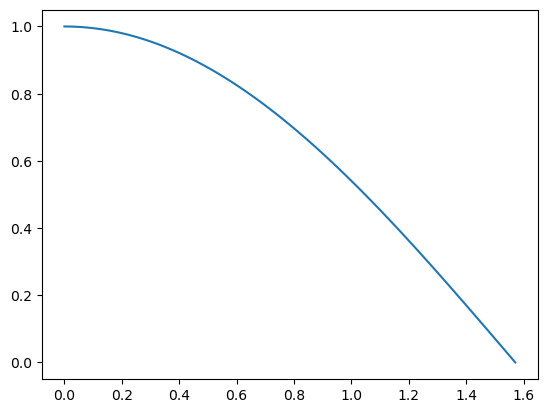

In [16]:
plt.plot(x, y)

In [30]:
theta = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

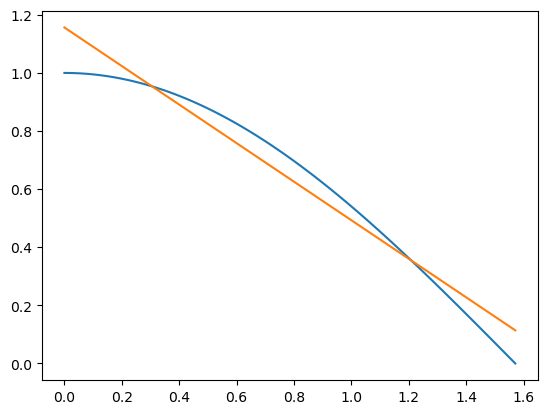

In [32]:
plt.plot(x[:,1], y)
plt.plot(x[:,1], np.dot(x, theta))

In [59]:
x = np.linspace(0, np.pi, 100)
y = np.ones(len(x))
y[np.cos(x)<0] = 0

In [60]:
x = np.c_[np.ones(len(x)), x]

In [61]:
theta = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

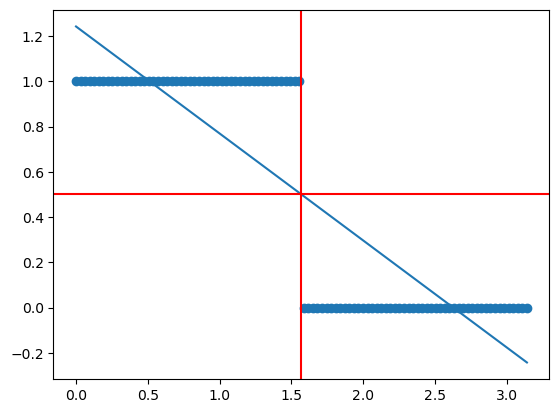

In [65]:
plt.scatter(x[:,1], y)
plt.plot(x[:,1], np.dot(x, theta))
plt.axhline(.5, c='r')
plt.axvline((.5-theta[0])/theta[1], c='r')
# 0.5를 기준으로 넘으면 t, 못넘으면 f

In [70]:
from math import exp, factorial

In [67]:
x = list(range(10))

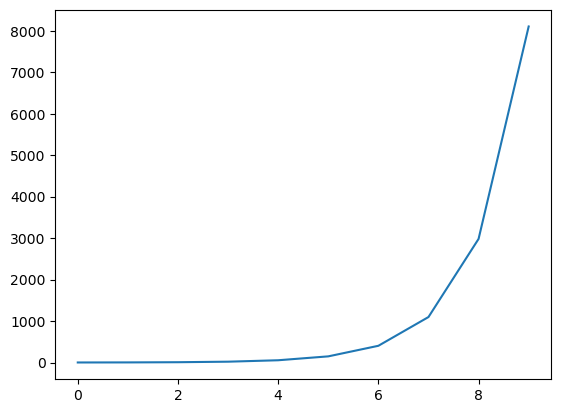

In [68]:
plt.plot(x, [exp(p) for p in x])

In [69]:
a = 1   # 특정점

In [78]:
def taylor(x, n=2):
    rst = 0.0
    for m in range(n):
        rst += (exp(a)/factorial(m))*(x-a)**m
    return rst

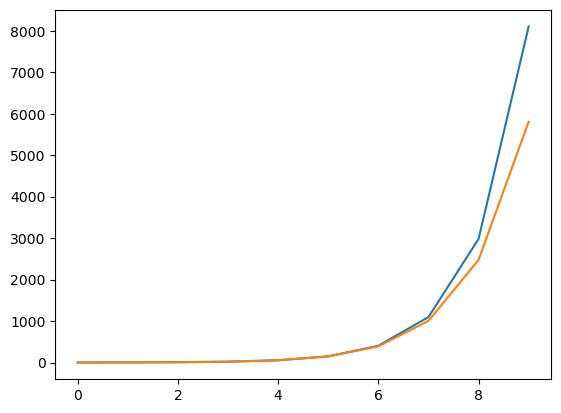

In [79]:
plt.plot(x, [exp(t) for t in x])
plt.plot(x, [taylor(p, n=10) for p in x])

In [93]:
# rosenbrock
fn = lambda x1, x2: ((1-x1)**2)+100*((x2-x1**2)**2)

dx1 = lambda x1, x2: -2*(1-x1)-400*x1*((x2-x1**2))
dx2 = lambda x1, x2: 200*(x2-x1**2)

In [102]:
from math import sqrt

h = 1e-3
xt = (-1.3, 0.9)

for i in range(10000):
    dxt = (dx1(*xt), dx2(*xt))
    vl = sqrt(dxt[0]**2+dxt[1]**2)
    u = (dxt[0]/vl, dxt[1]/vl)
    nx1 = xt[0] - h*u[0]
    nx2 = xt[1] - h*u[1]
    xt = (nx1, nx2)

In [104]:
xt, fn(*xt)

((0.9999517091388991, 0.998784239789347), 0.00012525890289545184)

In [105]:
# logistic
logistic1 = lambda x: 1/(1+np.exp(-x))
logistic2 = lambda x: np.exp(x)/(1+np.exp(x))

In [106]:
x = np.linspace(0, np.pi)
y = np.ones(len(x))
y[np.cos(x) < 0] = 0

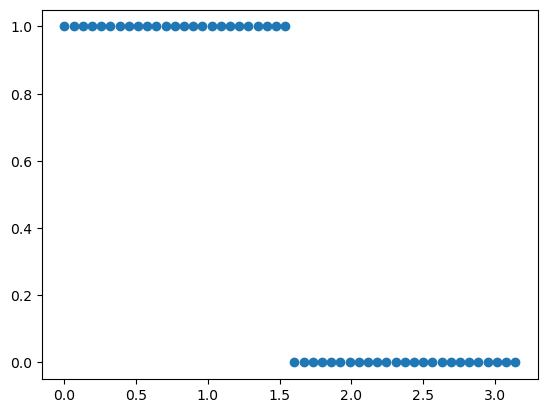

In [108]:
plt.scatter(x, y)

In [109]:
# fitting 시켜보자
x = np.c_[np.ones(len(x)), x]

In [110]:
theta = np.array([1,1])

In [114]:
for X, Y in zip((x, y)):
    print(X, Y)

ValueError: not enough values to unpack (expected 2, got 1)

In [130]:
h = 1e-3
theta = np.array([1,1])
for i in range(10000):
    for X, Y in zip(x, y):
        d = Y - logistic2(X.dot(theta.T))
        # for j in X:
        theta = theta + h*((X*d)/np.linalg.norm(X*d))

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_39400\1182666064.py:7: RuntimeWarning: invalid value encountered in divide
  theta = theta + h*((X*d)/np.linalg.norm(X*d))


In [131]:
theta

array([nan, nan])